In [1]:
import pandas as pd
import ast
import json
#from funciones import missing_values_table
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import gzip

# Funciones

In [2]:
def missing_values_table(df):
    '''
    Se pasa como parametro un df de pandas, devuelve la 
    cantidad de valores NaN y a que porcentaje del total de valores corresponen
    
    '''
    
    mis_val = df.isna().sum()
    mis_val_percent = 100 * df.isna().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

# 1 Extraccion

In [3]:
lineas = []   #Creamos una lista vacia 

with open('Dataset/australian_users_items.json', encoding='utf-8') as f:  #iteramos sobre cada uno de las lineas del DF y rellenamos la lista vacia con cada iteracion
    for line in f.readlines():
        lineas.append(ast.literal_eval(line))
        
user_items = pd.DataFrame(lineas)  #creamos el DF con los datos de la lista

In [4]:
user_items.head()

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


1. Veamos el tipo de datos

In [5]:
print('tipo de dato: ',user_items['items'].dtype)
user_items['items'].iloc[0]

tipo de dato:  object


[{'item_id': '10',
  'item_name': 'Counter-Strike',
  'playtime_forever': 6,
  'playtime_2weeks': 0},
 {'item_id': '20',
  'item_name': 'Team Fortress Classic',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '30',
  'item_name': 'Day of Defeat',
  'playtime_forever': 7,
  'playtime_2weeks': 0},
 {'item_id': '40',
  'item_name': 'Deathmatch Classic',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '50',
  'item_name': 'Half-Life: Opposing Force',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '60',
  'item_name': 'Ricochet',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '70',
  'item_name': 'Half-Life',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '130',
  'item_name': 'Half-Life: Blue Shift',
  'playtime_forever': 0,
  'playtime_2weeks': 0},
 {'item_id': '300',
  'item_name': 'Day of Defeat: Source',
  'playtime_forever': 4733,
  'playtime_2weeks': 0},
 {'item_id': '240',
  'item_name': 'Counter-Strike: S

2. Normalizamos: es objeto lista por lo tanto no usamos ast

In [6]:
df_exploded=user_items.explode('items',ignore_index=True)
df_exploded.head()

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '10', 'item_name': 'Counter-Strike..."
1,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '20', 'item_name': 'Team Fortress ..."
2,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '30', 'item_name': 'Day of Defeat'..."
3,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '40', 'item_name': 'Deathmatch Cla..."
4,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"{'item_id': '50', 'item_name': 'Half-Life: Opp..."


In [7]:
reviews_normalized=pd.json_normalize(df_exploded['items'])
reviews_normalized.tail()

,item_id,item_name,playtime_forever,playtime_2weeks
5170010,373330,All Is Dust,0.0,0.0
5170011,388490,One Way To Die: Steam Edition,3.0,3.0
5170012,521570,You Have 10 Seconds 2,4.0,4.0
5170013,519140,Minds Eyes,3.0,3.0
5170014,NaN,NaN,NaN,NaN


In [8]:
df_reviews_final=pd.concat([user_items,reviews_normalized],axis=1)
df_reviews_final.drop(columns=['items'],inplace=True)

In [9]:
df_reviews_final.head()

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277.0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6.0,0.0
1,js41637,888.0,76561198035864385,http://steamcommunity.com/id/js41637,20,Team Fortress Classic,0.0,0.0
2,evcentric,137.0,76561198007712555,http://steamcommunity.com/id/evcentric,30,Day of Defeat,7.0,0.0
3,Riot-Punch,328.0,76561197963445855,http://steamcommunity.com/id/Riot-Punch,40,Deathmatch Classic,0.0,0.0
4,doctr,541.0,76561198002099482,http://steamcommunity.com/id/doctr,50,Half-Life: Opposing Force,0.0,0.0


In [10]:
missing_values_table(df_reviews_final)

Your selected dataframe has 8 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
user_id,5081705,98.3
items_count,5081705,98.3
steam_id,5081705,98.3
user_url,5081705,98.3
item_id,16806,0.3
item_name,16806,0.3
playtime_forever,16806,0.3
playtime_2weeks,16806,0.3


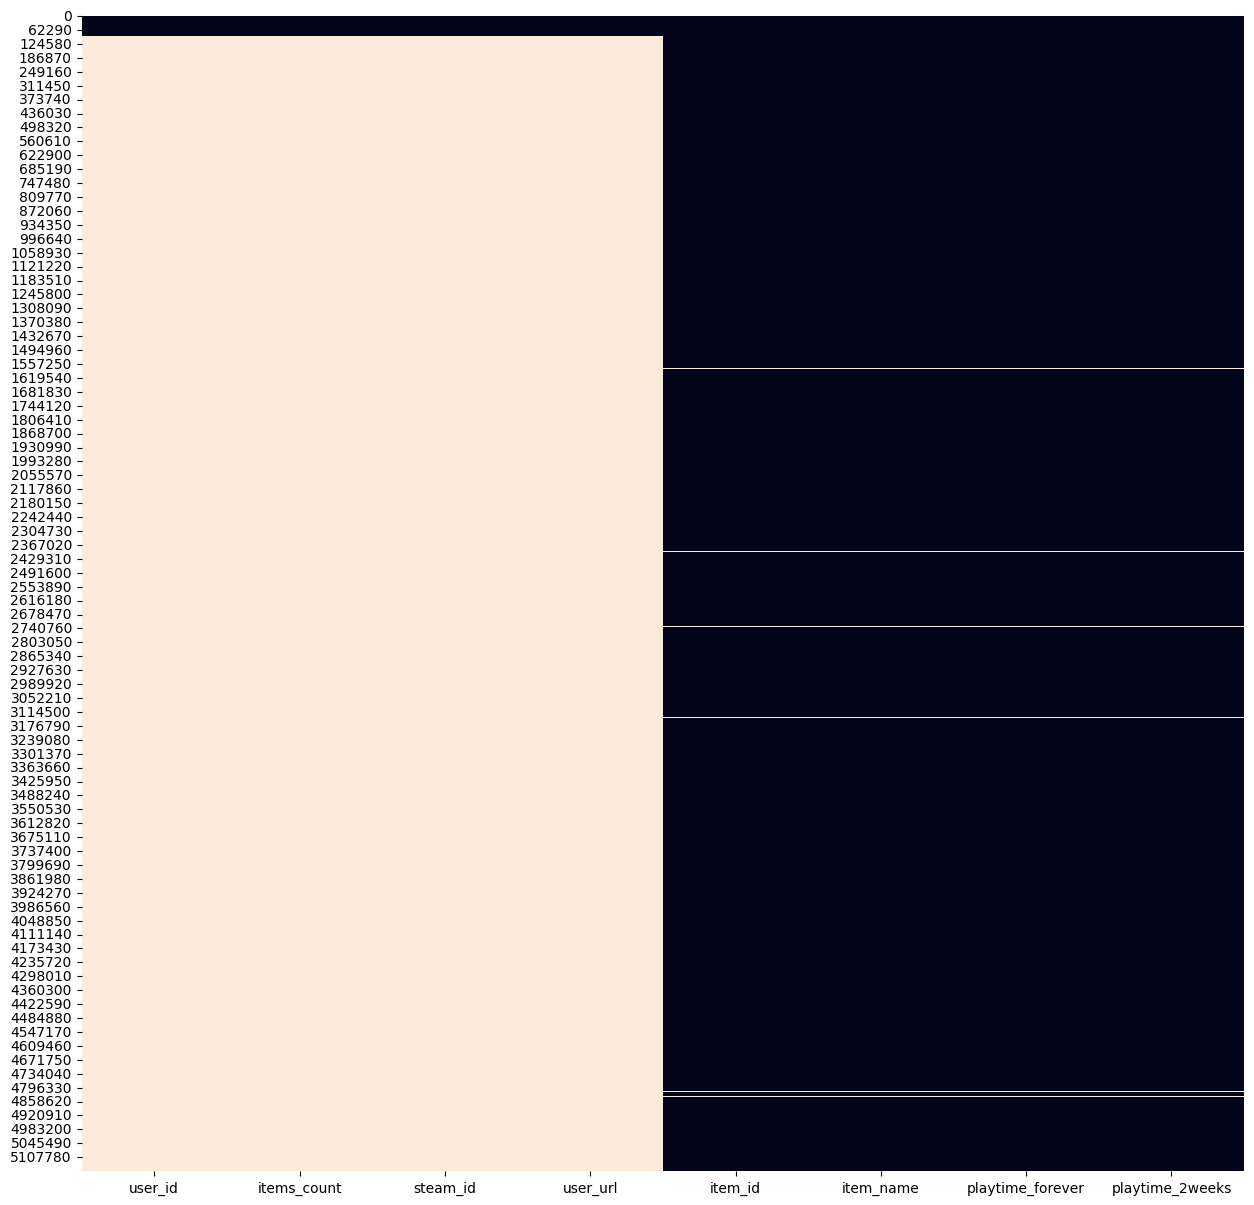

In [11]:
# Reemplazar todos los valores NaN por nan
df_reviews_final = df_reviews_final.fillna(np.nan)
#Observamos graficamente los valores nulos
fig = plt.figure(figsize=(15,15))
sns.heatmap(df_reviews_final.isnull(), cbar=False)
plt.show()

# Guardar datos

In [12]:
df_reviews_final.to_csv('./items.csv', index=False)